**Importing libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt

**Load the dataset**

In [ ]:
!wget https://archive.ics.uci.edu/static/public/249/first+order+theorem+proving.zip
!unzip first+order+theorem+proving.zip

--2023-06-20 12:14:08--  https://archive.ics.uci.edu/static/public/249/first+order+theorem+proving.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘first+order+theorem+proving.zip’

first+order+theorem     [    <=>             ]   1.10M  1.19MB/s    in 0.9s    

2023-06-20 12:14:10 (1.19 MB/s) - ‘first+order+theorem+proving.zip’ saved [1152791]

Archive:  first+order+theorem+proving.zip
 extracting: ml-prove.tar.gz         


In [ ]:
!tar -xvf ml-prove.tar.gz

ml-prove/
ml-prove/all-data-raw.csv
ml-prove/test.csv
ml-prove/train.csv
ml-prove/validation.csv
ml-prove/all-data-raw-statistics.txt
ml-prove/all-data-statistics.txt
ml-prove/bridge-holden-paulson-details.txt


In [ ]:
# Load the dataset
data = pd.read_csv("ml-prove/all-data-raw.csv", header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.73684,0.00188,0.73872,0.073308,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
1,0.83307,0.99682,0.83307,0.76948,0,0.77107,0.068363,0.16057,6,1.2734,...,0.74248,0.00188,0.74436,0.067669,0.18797,0.08,0.08,0.2,0.08,0.08
2,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.74060,0.00188,0.74248,0.069549,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
3,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.72932,0.00188,0.73120,0.080827,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00
4,0.83307,0.99682,0.83307,0.76789,0,0.76948,0.069952,0.16057,6,1.2734,...,0.73120,0.00188,0.73308,0.078947,0.18797,-100.00,-100.00,-100.0,-100.00,-100.00


In [ ]:
# Remove redundant features
data = data.drop([5, 21], axis=1)

In [ ]:
# Split features and labels
X = data.iloc[:, :-6]
y = data.iloc[:, -6:]

In [ ]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Create instances of different regression models
regressor_models = [
    LinearRegression(),
    RandomForestRegressor(),
    SVR()
]

Training Set Metrics:
Output 1 - MSE: 9.808992525256834e-12
Output 2 - MSE: 2365.026341876941
Output 3 - MSE: 2344.9712668546604
Output 4 - MSE: 2224.091019200182
Output 5 - MSE: 2362.8935729887494
Output 6 - MSE: 2253.9630440058195

Test Set Metrics:
Output 1 - MSE: 9.801306450340925e-12
Output 2 - MSE: 2414.3311036930395
Output 3 - MSE: 2954.497796201843
Output 4 - MSE: 2374.6407200754547
Output 5 - MSE: 2443.9753282428446
Output 6 - MSE: 2559.4735573298744


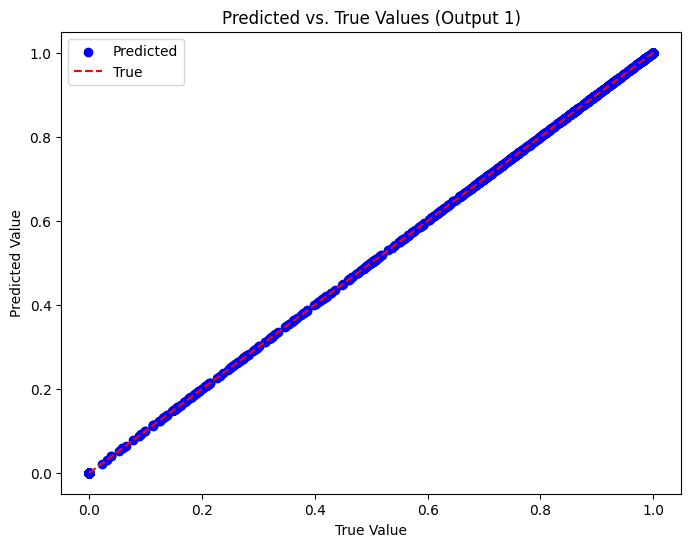

---------------------------
Training Set Metrics:
Output 1 - MSE: 1.4784298059357314e-05
Output 2 - MSE: 228.1860544159538
Output 3 - MSE: 231.1152515396615
Output 4 - MSE: 204.59464530721576
Output 5 - MSE: 239.7620338056379
Output 6 - MSE: 238.02135549013323

Test Set Metrics:
Output 1 - MSE: 9.671924430265324e-05
Output 2 - MSE: 1323.5711405200466
Output 3 - MSE: 1484.1605180680506
Output 4 - MSE: 1349.3372198991008
Output 5 - MSE: 1420.8437841697967
Output 6 - MSE: 1487.3067200787468


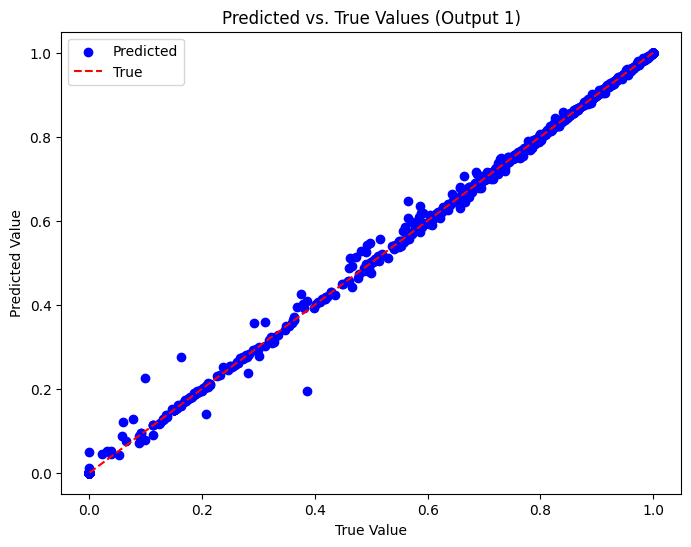

---------------------------
Training Set Metrics:
Output 1 - MSE: 0.0023311469638159004
Output 2 - MSE: 2642.181996030335
Output 3 - MSE: 3220.754304810645
Output 4 - MSE: 2613.449249535092
Output 5 - MSE: 2910.805518488152
Output 6 - MSE: 2837.795521586381

Test Set Metrics:
Output 1 - MSE: 0.003769271983773579
Output 2 - MSE: 2560.5002976355768
Output 3 - MSE: 3476.884099042255
Output 4 - MSE: 2827.7331252249955
Output 5 - MSE: 3029.3768880224216
Output 6 - MSE: 3068.972614633572


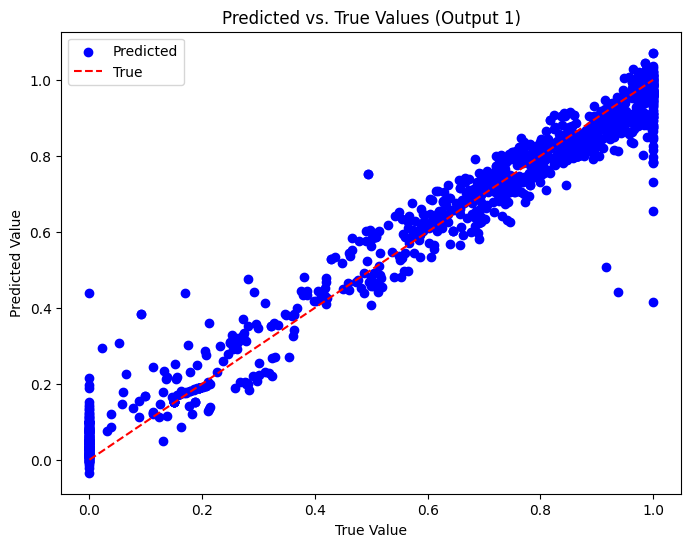

---------------------------


In [11]:
# Train and evaluate each regression model
for model in regressor_models:
    # Create an instance of the MultiOutputRegressor
    multioutput_model = MultiOutputRegressor(model)

    # Fit the model with the target variable
    multioutput_model.fit(X_train, y_train)

    # Make predictions on the training set
    y_train_pred = multioutput_model.predict(X_train)

    # Make predictions on the test set
    y_test_pred = multioutput_model.predict(X_test)

    # Calculate evaluation metrics for each output variable
    metrics_train = []
    metrics_test = []

    for i in range(y_train.shape[1]):
        mse_train = mean_squared_error(y_train.iloc[:, i], y_train_pred[:, i])
        mse_test = mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i])

        metrics_train.append(mse_train)
        metrics_test.append(mse_test)

    # Print the evaluation metrics for training set
    print('Training Set Metrics:')
    for i, mse_train in enumerate(metrics_train):
        print(f'Output {i+1} - MSE: {mse_train}')

    # Print the evaluation metrics for test set
    print('\nTest Set Metrics:')
    for i, mse_test in enumerate(metrics_test):
        print(f'Output {i+1} - MSE: {mse_test}')

    # Plot the predicted values vs. true values for the first output variable
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test.iloc[:, 0], y_test_pred[:, 0], color='blue', label='Predicted')
    plt.plot([min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], [min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], color='red', linestyle='--', label='True')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.title('Predicted vs. True Values (Output 1)')
    plt.legend()
    plt.show()

    print('---------------------------')
